In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import sklearn.model_selection as ms
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ah = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory=False)

<h1>01: Cleaning</h1>

In [4]:
ah = ah.fillna(0)

In [5]:
hoods = ah['Neighborhood']
new_hoods = []

for neigh in hoods :
    if neigh == 'Blueste' :
        new_hoods.append('SW')
    elif neigh == 'Blmngtn' :
        new_hoods.append('NO')
    elif neigh == 'BrDale' :
        new_hoods.append('NO')
    elif neigh == 'BrkSide' :
        new_hoods.append('DT')
    elif neigh == 'ClearCr' :
        new_hoods.append('NO')
    elif neigh == 'CollgCr' :
        new_hoods.append('SW')
    elif neigh == 'Crawfor' :
        new_hoods.append('SW')
    elif neigh == 'Edwards' :
        new_hoods.append('SW')
    elif neigh == 'Gilbert' :
        new_hoods.append('NO')
    elif neigh == 'IDOTRR' :
        new_hoods.append('DT')
    elif neigh == 'MeadowV' :
        new_hoods.append('SE')
    elif neigh == 'Mitchel' :
        new_hoods.append('SE')
    elif neigh == 'NAmes' :
        new_hoods.append('NO')
    elif neigh == 'NoRidge' :
        new_hoods.append('NW')
    elif neigh == 'NPkVill' :
        new_hoods.append('NO')
    elif neigh == 'NridgHt' :
        new_hoods.append('NW')
    elif neigh == 'NWAmes' :
        new_hoods.append('NO')
    elif neigh == 'OldTown' :
        new_hoods.append('DT')
    elif neigh == 'SWISU' :
        new_hoods.append('SW')
    elif neigh == 'Sawyer' :
        new_hoods.append('NW')
    elif neigh == 'SawyerW' :
        new_hoods.append('NW')
    elif neigh == 'Somerst' :
        new_hoods.append('NW')
    elif neigh == 'StoneBr' :
        new_hoods.append('NO')
    elif neigh == 'Timber' :
        new_hoods.append('SW')
    elif neigh == 'Veenker' :
        new_hoods.append('NW')
    elif neigh == 'Greens' :
        new_hoods.append('NW')
    elif neigh == 'GrnHill' :
        new_hoods.append('SO')
    elif neigh == 'Landmrk' :
        new_hoods.append('DT')
    else : print('no match')

ah['city_sec'] = new_hoods 

In [6]:
df_float = ah.select_dtypes(include='float')
df_float_to_int = df_float.astype(int)

<h5>❤️ Divide data into categorical and numerical, then check if those columns are equal</h5>

In [7]:
df_numerical = ah.select_dtypes(include='int64')
df_numerical = pd.concat([df_numerical,df_float_to_int],axis=1)
df_categorical = ah.select_dtypes(include='object')
print('There are',len(ah.columns) - (len(df_categorical.columns) + len(df_numerical.columns)),'missing columns')
if len(df_categorical.index) == len(df_numerical.index):
    print('There is an equal number of rows')
else : print('Unequal rows')
#82 columns total

There are 0 missing columns
There is an equal number of rows


In [8]:
dummies = pd.get_dummies(df_categorical,drop_first=True)
x = pd.concat([df_numerical,dummies],axis=1)
x = x.drop(columns = ['SalePrice'])
#x.drop('PID', axis=1, inplace=True)
y = df_numerical['SalePrice']
# x = x.drop(columns=['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFinSF1','BsmtFinSF2','MSZoning_I (all)',
#                     'Neighborhood_Blueste','Exterior2nd_PreCast','BsmtQual_Po','Electrical_SBrkr','MiscFeature_TenC','city_sec_SO',
#                    'GarageQual_Po','BsmtCond_Fa','GarageCond_Fa','Neighborhood_Greens','BsmtFinType2_BLQ','city_sec_NW',
#                    'Neighborhood_MeadowV','city_sec_SE','SaleCondition_Partial','city_sec_NO'])


<h1>02: Multiple Linear Regression</h1>

In [57]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)#, random_state = 3)
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    #print("The training r2: %.5f" % (mlr.score(X_train, y_train)))
    #print("The test     r2: %.5f" % (mlr.score(X_test, y_test)))
    scores.append(mlr.score(X_test, y_test))

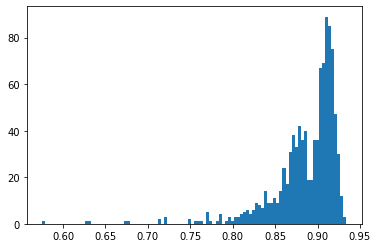

In [63]:
import matplotlib.pyplot as plt
scores2 = [1-s for s in scores]
plt.hist(scores, bins=100)
plt.show()

In [10]:
mlr.fit(X_train,y_train)
y_predict =  mlr.predict(X_test)
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
mlr_diff

NameError: name 'x_train' is not defined

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(x,y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

In [ ]:
#vif = pd.DataFrame()
#vif['var'] = x_train.columns
#vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [ ]:
inf = vif['VIF'] > 5
vifs = vif.loc[inf]
vifs['var']

In [ ]:
x_train

In [ ]:
y_train

In [66]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(silent=True)
model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

The training r2: 0.99356
The test     r2: 0.93143


In [70]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    %time model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

CPU times: user 7.13 s, sys: 833 ms, total: 7.96 s
Wall time: 2.09 s
CPU times: user 6.45 s, sys: 841 ms, total: 7.29 s
Wall time: 1.96 s
CPU times: user 6.4 s, sys: 820 ms, total: 7.22 s
Wall time: 1.98 s
CPU times: user 6.95 s, sys: 818 ms, total: 7.77 s
Wall time: 2.06 s
CPU times: user 6.85 s, sys: 784 ms, total: 7.63 s
Wall time: 2.07 s
CPU times: user 7.03 s, sys: 803 ms, total: 7.83 s
Wall time: 2.09 s
CPU times: user 7.02 s, sys: 816 ms, total: 7.83 s
Wall time: 2.06 s
CPU times: user 7 s, sys: 817 ms, total: 7.81 s
Wall time: 2.06 s
CPU times: user 7.51 s, sys: 814 ms, total: 8.32 s
Wall time: 2.24 s
CPU times: user 6.58 s, sys: 854 ms, total: 7.44 s
Wall time: 1.97 s
CPU times: user 7.1 s, sys: 829 ms, total: 7.93 s
Wall time: 2.08 s
CPU times: user 6.57 s, sys: 839 ms, total: 7.41 s
Wall time: 1.98 s
CPU times: user 7.5 s, sys: 793 ms, total: 8.3 s
Wall time: 2.14 s
CPU times: user 7.07 s, sys: 828 ms, total: 7.9 s
Wall time: 2.05 s
CPU times: user 6.74 s, sys: 823 ms, total

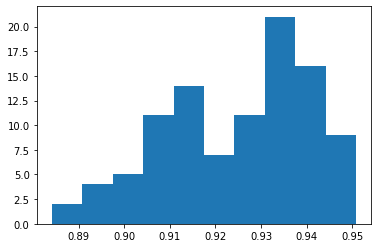

In [72]:
plt.hist(scores, bins=10)
plt.show()

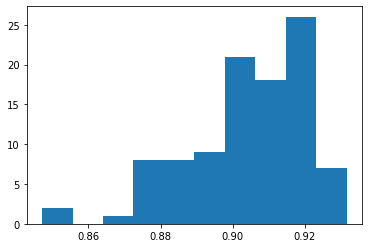

In [80]:
mlr_scores = []
mlr = LinearRegression()
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    mlr.fit(X_train, np.log10(y_train))
    mlr_scores.append(mlr.score(X_test, np.log10(y_test)))
plt.hist(mlr_scores, bins=10)
plt.show()

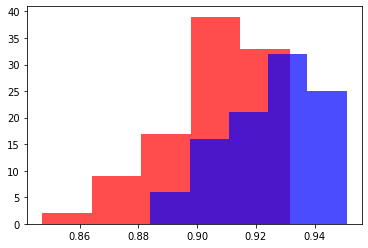

In [94]:
plt.hist(mlr_scores, bins=5, alpha = 0.7, color='red')
plt.hist(scores, bins=5, alpha = 0.7, color='blue')
plt.show()

In [84]:
np.mean(mlr_scores)

0.9045737763829537

In [85]:
np.mean(scores)

0.92485326307994